## Customer Segmentation and Market Analysis
### Yesu Babu Jonnadula

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
df=pd.read_csv('shopping_behavior_updated.csv')

In [138]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### Exploratory Data Analysis

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [140]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [141]:
df=df.drop_duplicates()

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [143]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


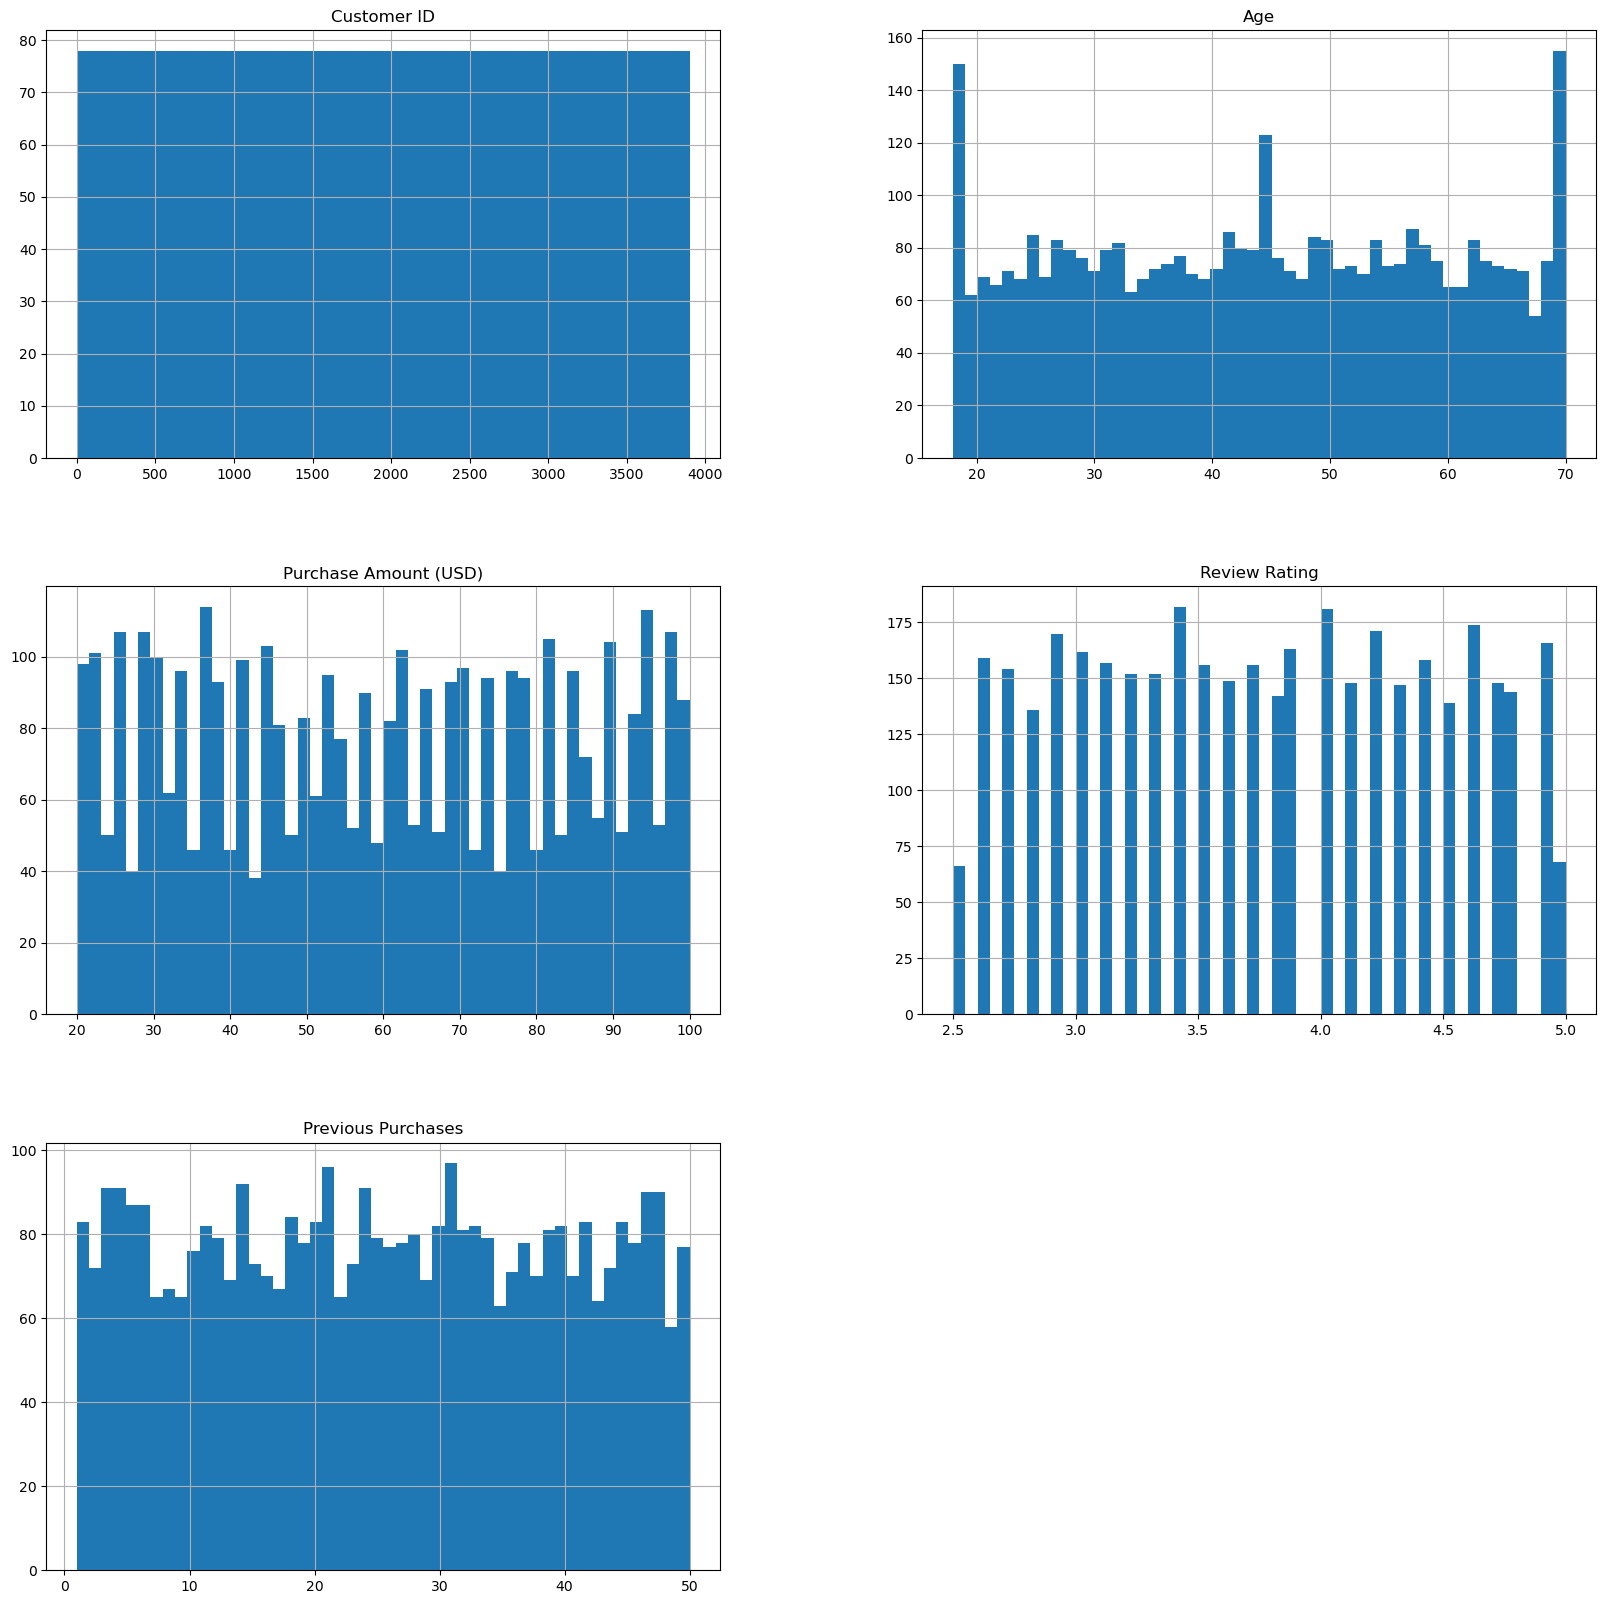

In [144]:
# As the customer id column will not compansate anything for prediction or clustering as it is a unique idenntifier of each 
# record let us remove it.

df.hist(figsize=(20,20),bins=50)
plt.show()

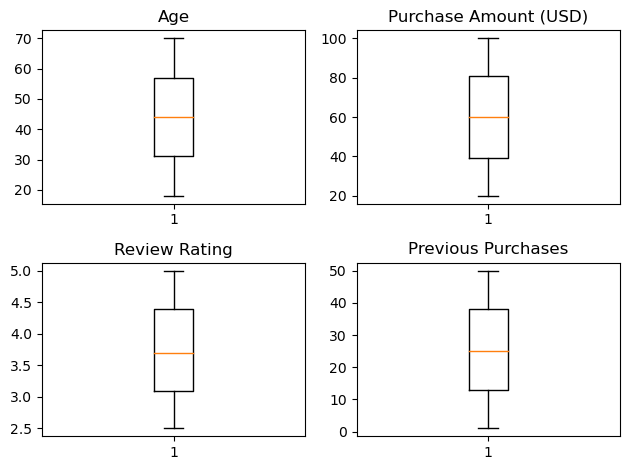

In [145]:
## let us perform the outlier handling


# Create the first subplot
plt.subplot(2, 2, 1)
plt.boxplot(df['Age'])
plt.title('Age')

# Create the second subplot
plt.subplot(2, 2, 2)
plt.boxplot(df['Purchase Amount (USD)'])
plt.title('Purchase Amount (USD)')

# Create the third subplot
plt.subplot(2, 2, 3)
plt.boxplot(df['Review Rating'])
plt.title('Review Rating')

# Create the fourth subplot
plt.subplot(2, 2, 4)
plt.boxplot(df['Previous Purchases'])
plt.title('Previous Purchases')

plt.tight_layout()
plt.show()

### NO Outliers are there .

In [146]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [147]:
df['Category'].value_counts()

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

In [148]:
grouped_df=df.groupby(['Gender'])['Purchase Amount (USD)'].agg(['sum', 'count']).reset_index()
grouped_df['Average Spending per Person'] = grouped_df['sum'] / grouped_df['count']
grouped_df

,Gender,sum,count,Average Spending per Person
0,Female,75191,1248,60.249199
1,Male,157890,2652,59.536199


<Axes: xlabel='Gender', ylabel='Average Spending per Person'>

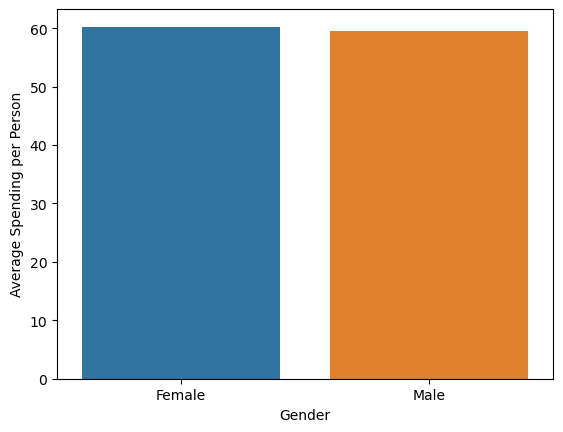

In [149]:
grouped_df=df.groupby('Gender')['Purchase Amount (USD)'].agg(['sum', 'count']).reset_index()
grouped_df['Average Spending per Person'] = grouped_df['sum'] / grouped_df['count']

sns.barplot(data=grouped_df,x='Gender',y='Average Spending per Person')
## If we observe the male are spending more amount among all

In [150]:
## Here even thought the female count in data set is less as the data is imbalanced the purchasing power 
## and total spending by each person in 2 genders the female are little high
## The female 

In [151]:
## Let us plot the pie chart for male and female with percentages of various categories of spending 
grouped_df=df.groupby(['Gender','Category'])['Purchase Amount (USD)'].agg(['sum']).reset_index()


In [152]:
grouped_df

,Gender,Category,sum
0,Female,Accessories,23819
1,Female,Clothing,33636
2,Female,Footwear,11835
3,Female,Outerwear,5901
4,Male,Accessories,50381
5,Male,Clothing,70628
6,Male,Footwear,24258
7,Male,Outerwear,12623


Text(0.5, 1.0, 'Female Spending')

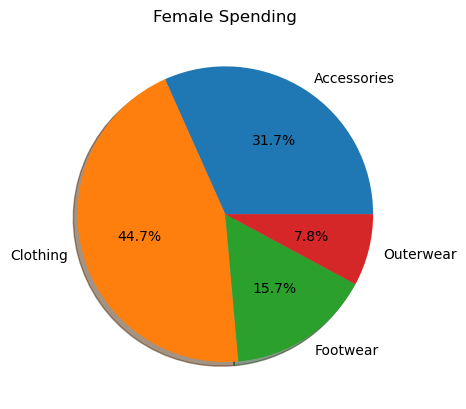

In [153]:
plt.pie(grouped_df.loc[:3,'sum'],labels=grouped_df.loc[:3,'Category'], autopct='%1.1f%%',shadow = True)
plt.title('Female Spending')

In [154]:
## Female are spending almost 45% of spending on clothing which is followed by Accessories with 31.7%

Text(0.5, 1.0, 'Male Spending')

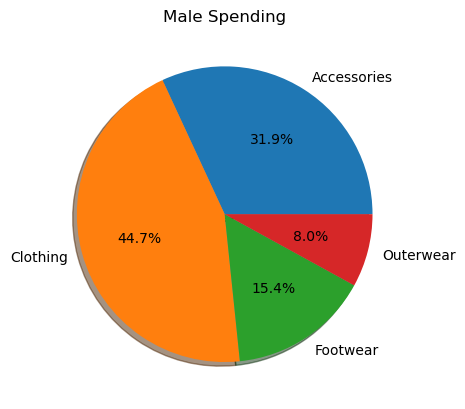

In [155]:
plt.pie(grouped_df.loc[4:,'sum'],labels=grouped_df.loc[4:,'Category'], autopct='%1.1f%%',shadow = True)
plt.title('Male Spending')

In [156]:
## Male also spending their majority expenditure in clothing which follows accessories and footwear

In [157]:
df['Location'].value_counts()

Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
Louisiana         84
North Dakota      83
Missouri          81
West Virginia     81
New Mexico        81
Mississippi       80
Indiana           79
Georgia           79
Kentucky          79
Arkansas          79
North Carolina    78
Connecticut       78
Virginia          77
Ohio              77
Tennessee         77
Texas             77
Maine             77
South Carolina    76
Colorado          75
Oklahoma          75
Wisconsin         75
Oregon            74
Pennsylvania      74
Washington        73
Michigan          73
Alaska            72
Massachusetts     72
Wyoming           71
Utah              71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Hawaii            65
Arizona      

<BarContainer object of 50 artists>

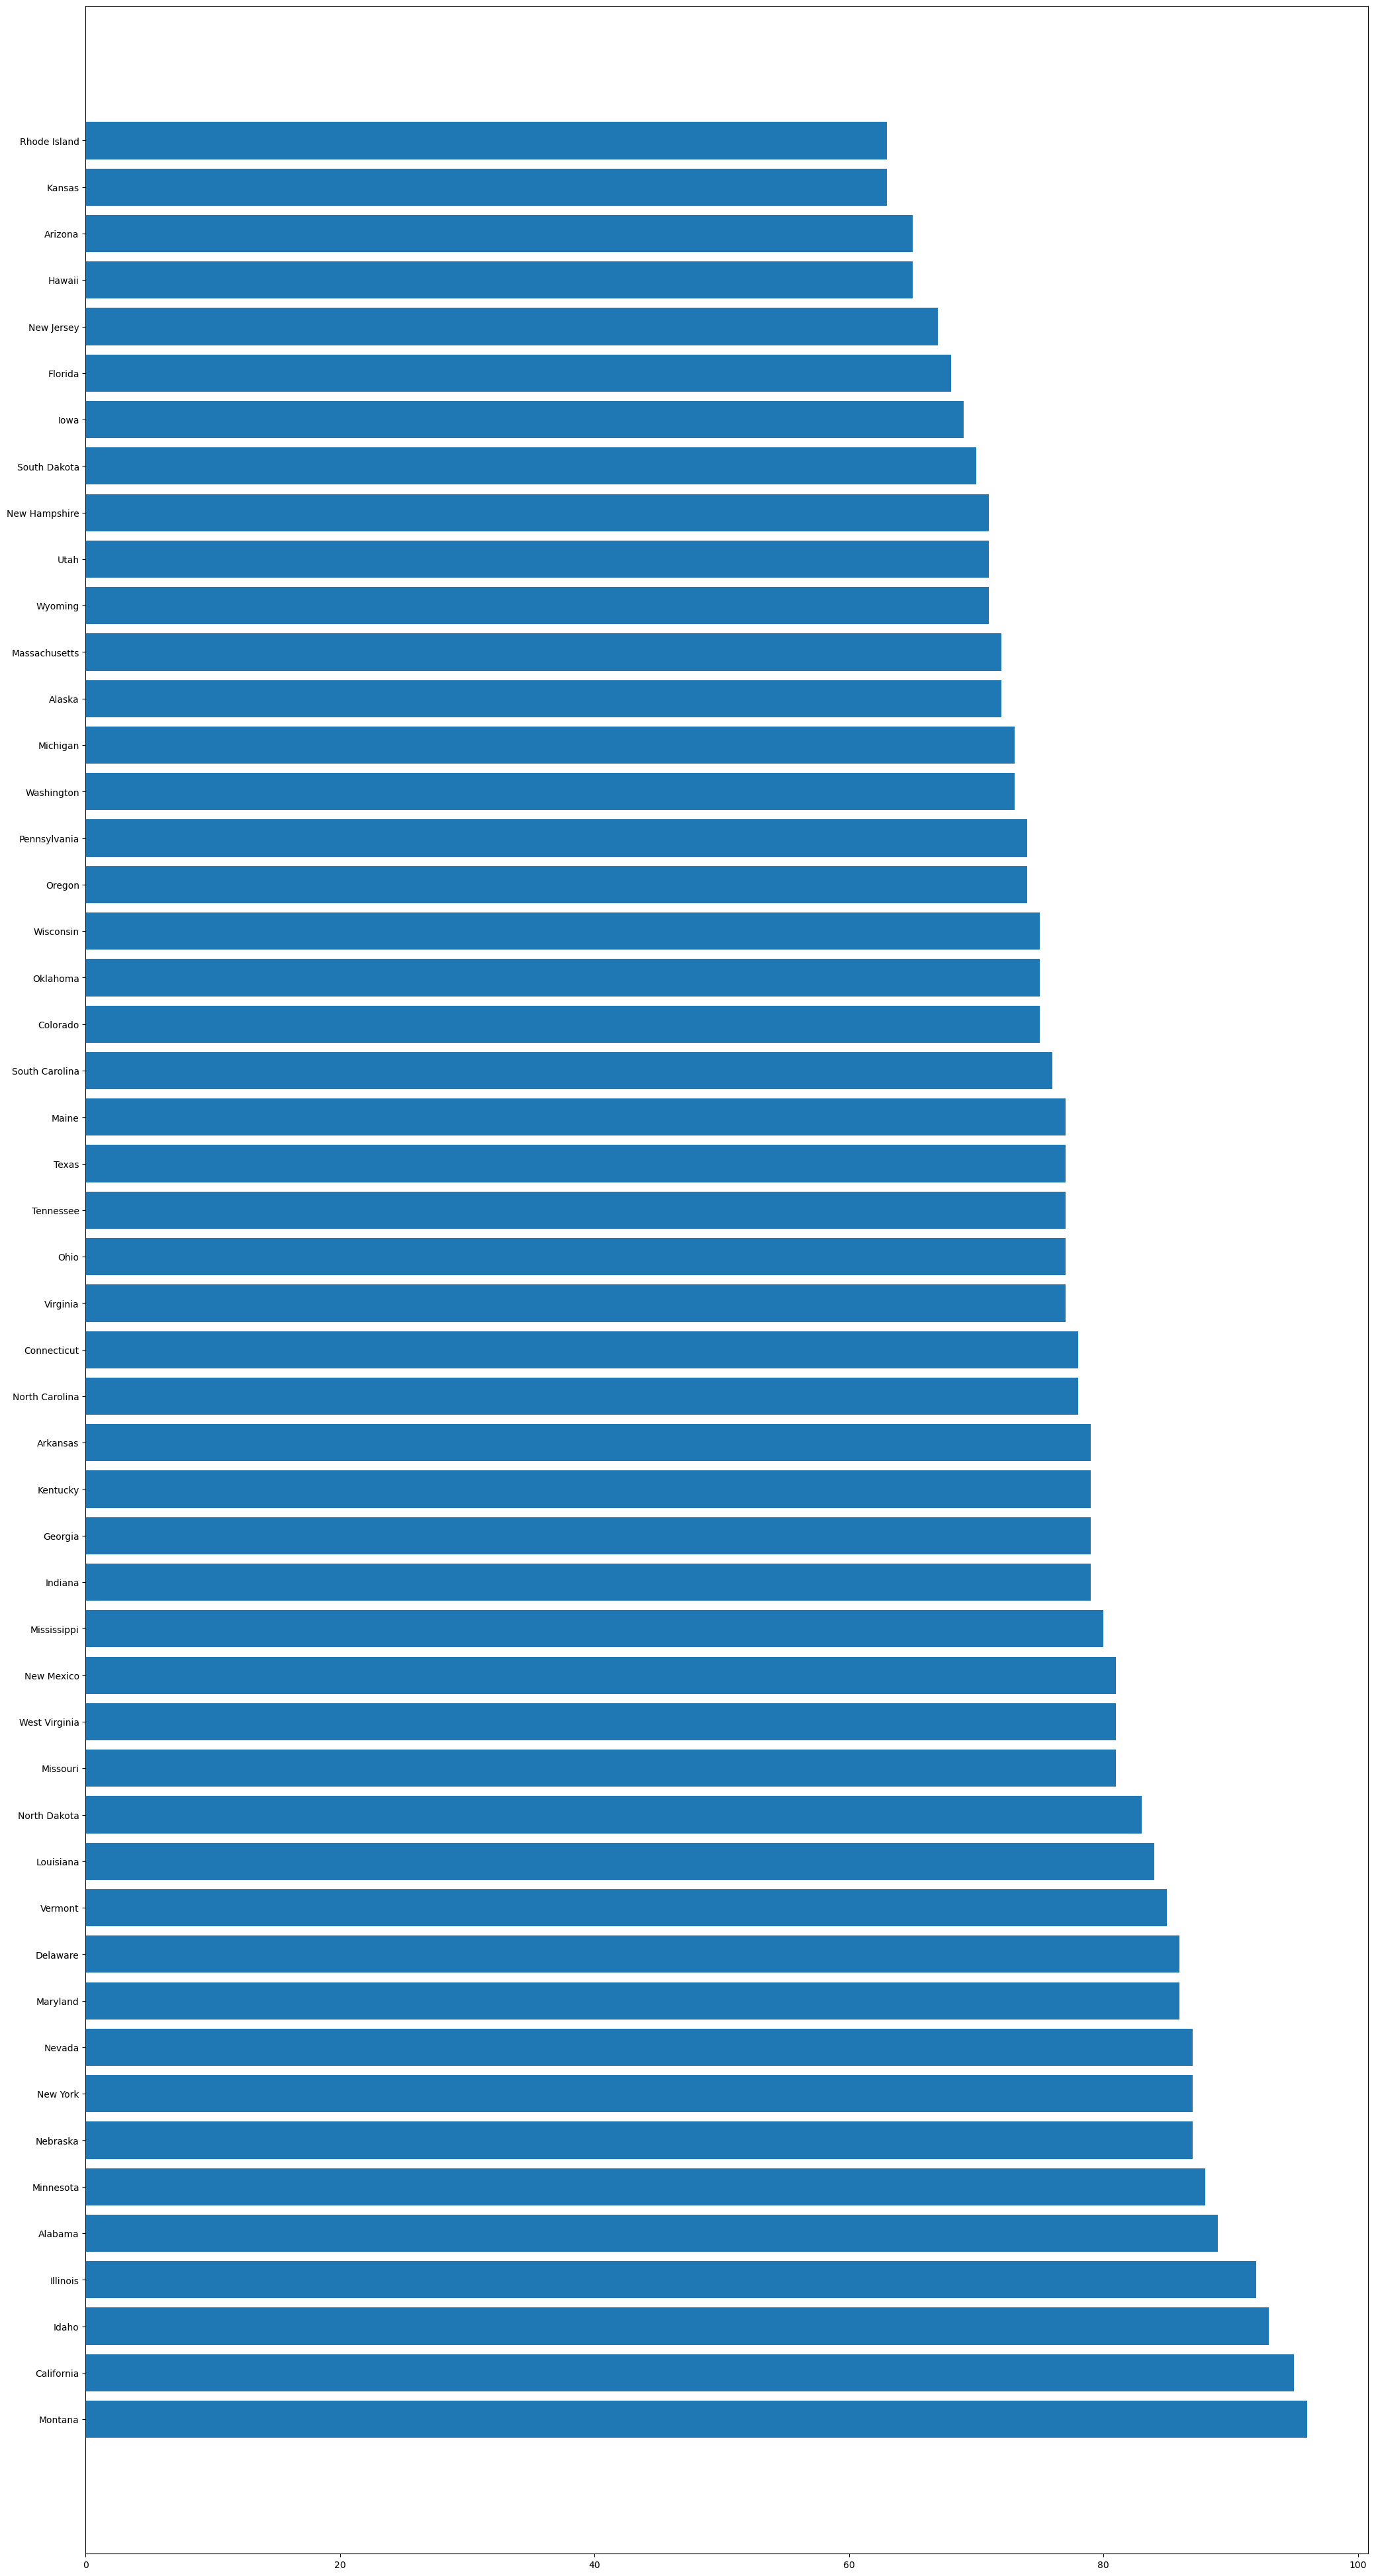

In [158]:
plt.figure(figsize=(25,50))
plt.barh(df['Location'].value_counts().index,df['Location'].value_counts().values)

In [159]:
###  Montana ,California,idaho are the top 3 locations where the purchases are more

In [160]:
df['Age'].value_counts()

69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: Age, dtype: int64

In [161]:
grouped_df=df.groupby(['Age','Category'])['Customer ID'].count().unstack()
grouped_df

Category,Accessories,Clothing,Footwear,Outerwear
Age,,,,
18,18,33,8,10
19,25,36,12,8
20,16,35,8,3
21,20,35,9,5
22,25,29,6,6
23,19,29,14,9
24,19,39,4,6
25,30,33,18,4
26,24,27,10,8


<Axes: xlabel='Age'>

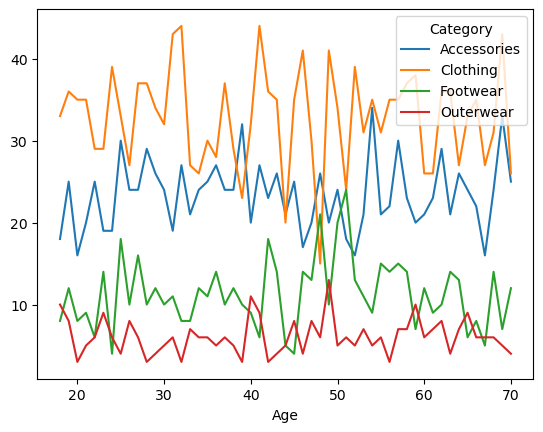

In [162]:
grouped_df.plot()

In [163]:
## Here the clothing is more for  all age people but with 40+ years it is little more and accessories are brought by 55+ years 
## people are more 

In [164]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [165]:
## let us find which which size of items are purchased more based on which category 
grouped_df=df.groupby(['Category','Size'])['Customer ID'].count().reset_index()
grouped_df

,Category,Size,Customer ID
0,Accessories,L,307
1,Accessories,M,562
2,Accessories,S,230
3,Accessories,XL,141
4,Clothing,L,481
5,Clothing,M,778
6,Clothing,S,284
7,Clothing,XL,194
8,Footwear,L,172
9,Footwear,M,267


<Axes: xlabel='Category', ylabel='Customer ID'>

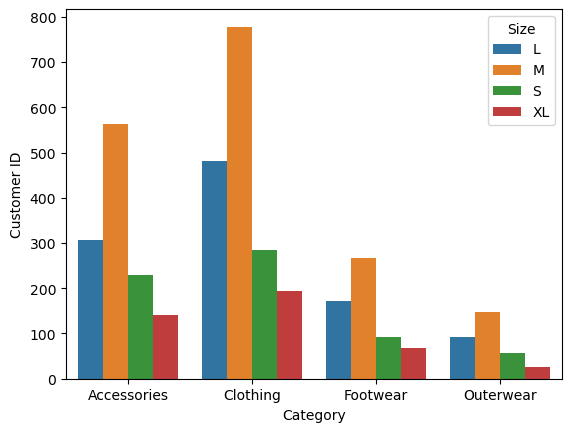

In [166]:
sns.barplot(grouped_df,x='Category',y='Customer ID',hue='Size')

In [167]:
## The customers are mostly purchasing the medium sized items in all categories which followed by large size items

In [168]:
grouped_df=df.groupby(['Season','Item Purchased'])['Customer ID'].count().reset_index()

In [169]:
df['Item Purchased'].value_counts()

Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: Item Purchased, dtype: int64

In [170]:
grouped_df_sorted = grouped_df.sort_values(by=['Season', 'Customer ID'], ascending=[True, False])
grouped_df_sorted 

,Season,Item Purchased,Customer ID
10,Fall,Jacket,54
8,Fall,Hat,50
7,Fall,Handbag,48
19,Fall,Skirt,46
14,Fall,Sandals,44
...,...,...,...
81,Winter,Gloves,32
89,Winter,Sandals,32
78,Winter,Boots,31
86,Winter,Jeans,29


In [171]:
top_three=grouped_df_sorted.groupby('Season').head(3)

<Axes: xlabel='Season', ylabel='Customer ID'>

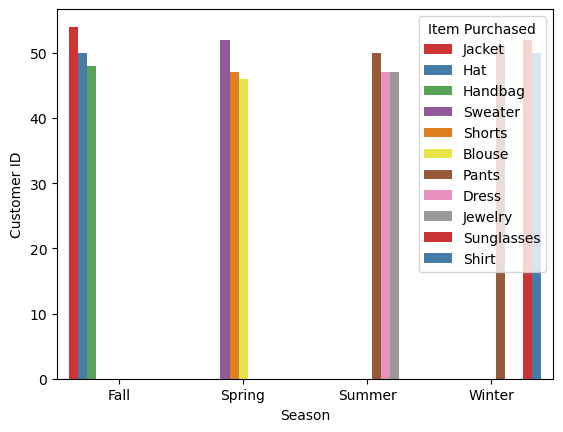

In [172]:
sns.barplot(top_three,x='Season',y='Customer ID',hue='Item Purchased',palette='Set1')

In [173]:
## See the customers are buying more jackets in winter and fall (as the fall is starting of winter) and most customers are 
## prefering to brought the pants,dresses,jewelery at summer there is a relation between seasons and purchased items

In [174]:
## Let us find the customer satisfaction with purchased category items so let us find category wise satisfaction of customers
customer_satisfaction=df.groupby(['Category','Discount Applied','Promo Code Used'])['Review Rating'].agg(['mean','count']).reset_index()

In [175]:
customer_satisfaction

,Category,Discount Applied,Promo Code Used,mean,count
0,Accessories,No,No,3.774605,697
1,Accessories,Yes,Yes,3.760958,543
2,Clothing,No,No,3.733002,1006
3,Clothing,Yes,Yes,3.709576,731
4,Footwear,No,No,3.787647,340
5,Footwear,Yes,Yes,3.794595,259
6,Outerwear,No,No,3.773889,180
7,Outerwear,Yes,Yes,3.713194,144


In [176]:
customer_satisfaction_sorted=customer_satisfaction.sort_values(by=['Category','mean'], ascending=[True, False])

In [177]:
customer_satisfaction_sorted

,Category,Discount Applied,Promo Code Used,mean,count
0,Accessories,No,No,3.774605,697
1,Accessories,Yes,Yes,3.760958,543
2,Clothing,No,No,3.733002,1006
3,Clothing,Yes,Yes,3.709576,731
5,Footwear,Yes,Yes,3.794595,259
4,Footwear,No,No,3.787647,340
6,Outerwear,No,No,3.773889,180
7,Outerwear,Yes,Yes,3.713194,144


In [178]:
customer_satisfaction_sorted['Benefited']=customer_satisfaction_sorted['Discount Applied']

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accessories'),
  Text(1, 0, 'Clothing'),
  Text(2, 0, 'Footwear'),
  Text(3, 0, 'Outerwear')])

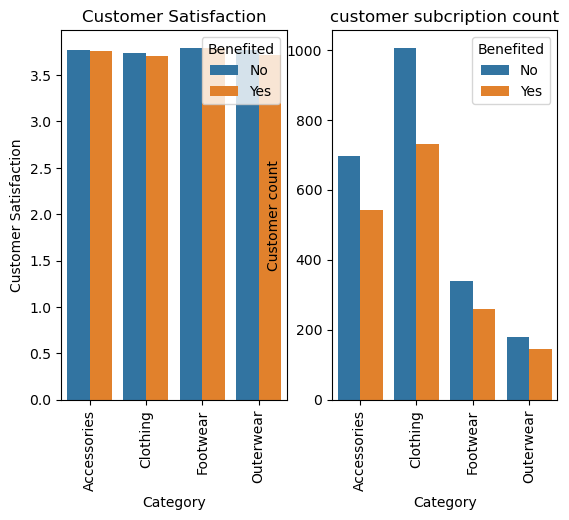

In [179]:
plt.subplot(1,2,1)
sns.barplot(customer_satisfaction_sorted,x='Category',y='mean',hue='Benefited')
plt.title("Customer Satisfaction")
plt.xlabel('Category')
plt.ylabel('Customer Satisfaction')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(customer_satisfaction_sorted,x='Category',y='count',hue='Benefited')
plt.title('customer subcription count')
plt.xlabel('Category')
plt.ylabel('Customer count')
plt.xticks(rotation=90)

In [180]:
## Almost customers are satisfied with their products on a average of 3.75 among all these categories and there is very slight
## difference for customers who got benefited with discounts and promo codes and not benifited

## From second plot we can observe that the how the marketing strategies of advertisements of discounts,promos reaching customers
## here if we observe for each category the benefited means the people using discounts and promo codes are less when compared 
## with those of not using so the marketing strategy should be changed

In [181]:
a=df.groupby(['Category','Subscription Status'])['Customer ID'].count().reset_index()
a

,Category,Subscription Status,Customer ID
0,Accessories,No,906
1,Accessories,Yes,334
2,Clothing,No,1280
3,Clothing,Yes,457
4,Footwear,No,428
5,Footwear,Yes,171
6,Outerwear,No,233
7,Outerwear,Yes,91


<Axes: xlabel='Category', ylabel='Customer ID'>

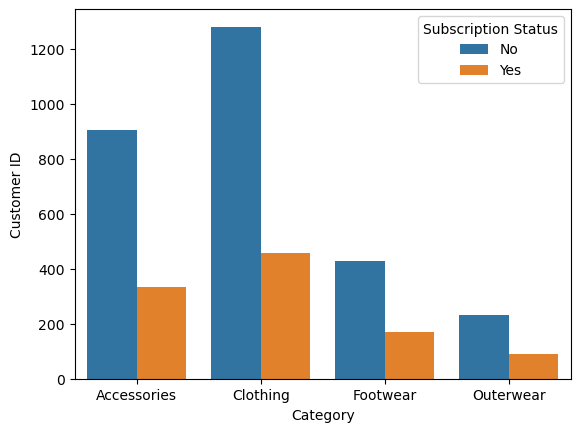

In [182]:
sns.barplot(a,x='Category',y='Customer ID',hue='Subscription Status')

In [183]:
## Most of the customers are without subscription only and in every category the accessories,clothing,footwear,outwear all are
## purchased by customers group with half took subcription

In [184]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Fortnightly'),
  Text(1, 0, 'Weekly'),
  Text(2, 0, 'Annually'),
  Text(3, 0, 'Quarterly'),
  Text(4, 0, 'Bi-Weekly'),
  Text(5, 0, 'Monthly'),
  Text(6, 0, 'Every 3 Months')])

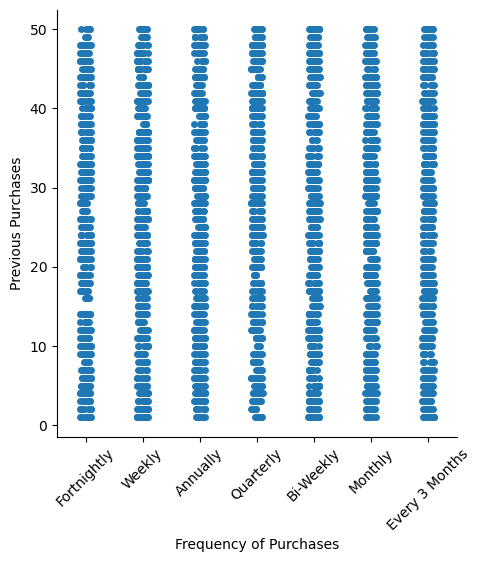

In [185]:
sns.catplot(data=df, x="Frequency of Purchases", y="Previous Purchases")
plt.xticks(rotation=45)

In [186]:
df[(df['Previous Purchases']<=5) & (df['Frequency of Purchases']=="Annually")]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
105,106,69,Male,Backpack,Accessories,96,New York,M,Charcoal,Fall,3.6,Yes,Next Day Air,Yes,Yes,4,Bank Transfer,Annually
151,152,28,Male,Sunglasses,Accessories,47,North Dakota,L,Turquoise,Fall,4.5,Yes,Next Day Air,Yes,Yes,3,Venmo,Annually
175,176,53,Male,Coat,Outerwear,86,Oklahoma,L,Violet,Fall,2.8,Yes,Next Day Air,Yes,Yes,2,Bank Transfer,Annually
238,239,64,Male,Skirt,Clothing,34,Ohio,M,Peach,Fall,4.2,Yes,Free Shipping,Yes,Yes,5,Cash,Annually
306,307,26,Male,Jacket,Outerwear,49,North Dakota,S,White,Summer,3.6,Yes,Express,Yes,Yes,4,Cash,Annually
395,396,37,Male,Sneakers,Footwear,65,Rhode Island,L,Brown,Winter,4.9,Yes,Store Pickup,Yes,Yes,2,PayPal,Annually
680,681,58,Male,Sneakers,Footwear,25,Tennessee,M,Magenta,Spring,4.2,Yes,Express,Yes,Yes,3,PayPal,Annually
750,751,25,Male,T-shirt,Clothing,95,Maryland,L,Violet,Fall,3.4,Yes,Free Shipping,Yes,Yes,5,Venmo,Annually
830,831,41,Male,Shorts,Clothing,76,Wyoming,M,Maroon,Fall,4.2,Yes,Express,Yes,Yes,5,Credit Card,Annually
864,865,51,Male,Jeans,Clothing,59,Kentucky,S,Charcoal,Winter,3.9,Yes,Next Day Air,Yes,Yes,5,PayPal,Annually


In [187]:
## these are the people all of purchasing less there is any chance of attrition or churn so giving more discounts 
## improved marketing strategies help to avoid of retention of these customers who purchase occasionally

### Feature Engineering and Selection

In [188]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


#### Handling Categorical Variables

In [189]:
df['Gender']=np.where(df['Gender']=='Male',1,0)

In [190]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [191]:
dict={j:i for i,j in enumerate(df['Item Purchased'].value_counts().index)}
df['Item Purchased']=df['Item Purchased'].map(dict)

In [192]:
dict={j:i for i,j in enumerate(df['Category'].value_counts().index)}
df['Category']=df['Category'].map(dict)

In [193]:
dict={j:i for i,j in enumerate(df['Location'].value_counts().index)}
df['Location']=df['Location'].map(dict)

In [194]:
dict={j:i for i,j in enumerate(df['Size'].value_counts().index)}
df['Size']=df['Size'].map(dict)

In [195]:
df=df.drop('Color',axis=1)

In [196]:
dict={j:i for i,j in enumerate(df['Season'].value_counts().index)}
df['Season']=df['Season'].map(dict)

In [197]:
df['Subscription Status']=np.where(df['Subscription Status']=="No",0,1)

In [198]:
dict={j:i for i,j in enumerate(df['Shipping Type'].value_counts().index)}
df['Shipping Type']=df['Shipping Type'].map(dict)

In [199]:
df['Benefited']=df['Discount Applied']
df=df.drop(['Discount Applied','Promo Code Used'],axis=1)


In [200]:
df['Benefited']=np.where(df['Benefited']=="Yes",1,0)

In [201]:
dict={j:i for i,j in enumerate(df['Payment Method'].value_counts().index)}
df['Payment Method']=df['Payment Method'].map(dict)

In [202]:
dict={j:i for i,j in enumerate(df['Frequency of Purchases'].value_counts().index)}
df['Frequency of Purchases']=df['Frequency of Purchases'].map(dict)

In [203]:
df=df.drop(['Customer ID','Item Purchased'],axis=1)

In [213]:
df=df.drop('Shipping Type',axis=1)

In [214]:
df=df.drop('Size',axis=1)

In [215]:
df=df.drop(['Previous Purchases','Payment Method','Frequency of Purchases'],axis=1)

In [216]:
df=df.drop('Benefited',axis=1)

In [217]:
df.head()

,Age,Gender,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status
0,0.718913,0.685994,-0.913822,-0.285629,-0.210657,0.462486,-0.907584,1.644294
1,-1.648629,0.685994,-0.913822,0.178852,0.344781,0.462486,-0.907584,1.644294
2,0.390088,0.685994,-0.913822,0.558882,1.039080,-1.325120,-0.907584,1.644294
3,-1.517099,0.685994,1.176445,1.276716,1.802808,-1.325120,-0.349027,1.644294
4,0.061263,0.685994,-0.913822,-0.454531,0.691931,-1.325120,-1.466141,1.644294


In [218]:
### lets scale the features now
from sklearn.preprocessing import StandardScaler



# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


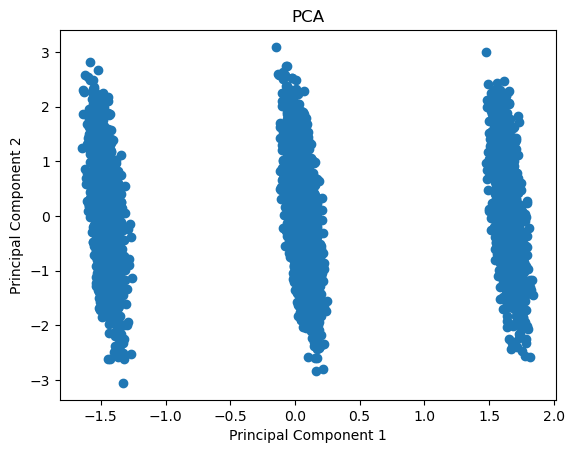

Variance explained by each component: [0.1773613  0.13105565]


In [219]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Initialize PCA with the desired number of components
num_components = 2  # Adjust the number of components as needed
pca = PCA(n_components=num_components)

# Fit PCA to your data and transform it
df_pca = pca.fit_transform(df)
df_pca=pd.DataFrame(df_pca,columns=['pc1','pc2'])
# Plot the first two principal components
plt.scatter(df_pca['pc1'], df_pca['pc2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.show()

# Print the variance explained by each principal component
print("Variance explained by each component:", pca.explained_variance_ratio_)


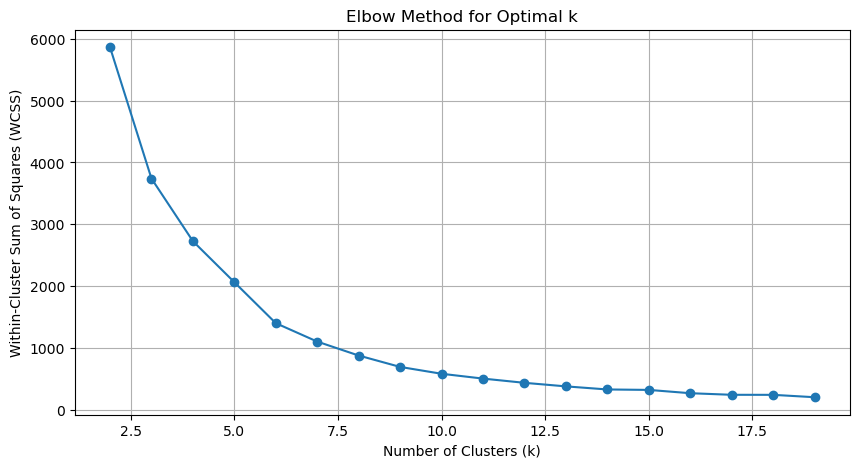

In [220]:
# Let us create clusters using k means based on Age,Gender,Category,Location,Season
from sklearn.cluster import KMeans

# Perform K-means clustering for different values of k
k_values = range(2, 20)
wcss_values = []

for k in k_values:
    # Fit KMeans clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    
    # Compute WCSS
    wcss = kmeans.inertia_
    wcss_values.append(wcss)

# Plot WCSS
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [221]:
#lets take k=8
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt



# Perform K-means++ clustering with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=0)  # K-means++ is the default initialization method
clusters = kmeans.fit_predict(df_pca)



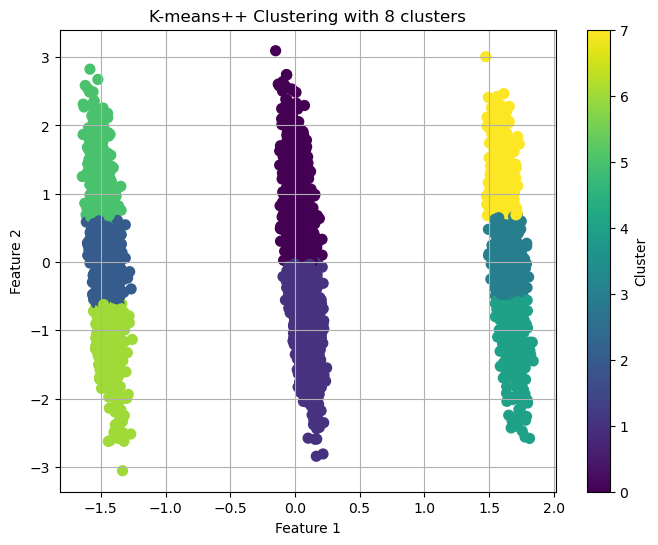

In [222]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['pc1'], df_pca['pc2'], c=clusters, cmap='viridis', marker='o', s=50)
plt.title('K-means++ Clustering with 8 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [212]:
df_pca

,pc1,pc2
0,2.022869,-0.772183
1,1.936091,-0.092863
2,1.976599,0.318937
3,2.030492,0.805861
4,1.967458,-0.814551
...,...,...
3895,-1.587694,-0.402131
3896,-1.617893,0.383843
3897,-1.669802,-1.089654
3898,-1.586033,-0.000915
